<a href="https://colab.research.google.com/github/Oumaima023/DeepLearning_FNN/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from google.colab import drive, files
import tensorflow as tf


# Mount Google Drive
drive.mount('/content/drive')
files.upload()

ValueError: mount failed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sexe(F/H)          52 non-null     int64  
 1   Age                52 non-null     int64  
 2   BV(mm^3)           52 non-null     float64
 3   TV(mm^3)           52 non-null     float64
 4   BV/TV              52 non-null     float64
 5   Tb.Th Mean(mm)     52 non-null     float64
 6   Tb.Th Std Dev(mm)  52 non-null     float64
 7   Tb.Th Max (mm)     52 non-null     float64
 8   Euler char (x)     52 non-null     float64
 9   Corr.Euler         52 non-null     float64
 10  Connectivity       52 non-null     float64
 11  Conn.D(mm^3)       52 non-null     float64
 12  Tb.Sp Mean(mm)     52 non-null     float64
 13  Tb.Sp Std Dev(mm)  52 non-null     float64
 14  Tb.Sp Max(mm)      52 non-null     float64
 15  Result             52 non-null     int64  
dtypes: float64(13), int64(3)
mem

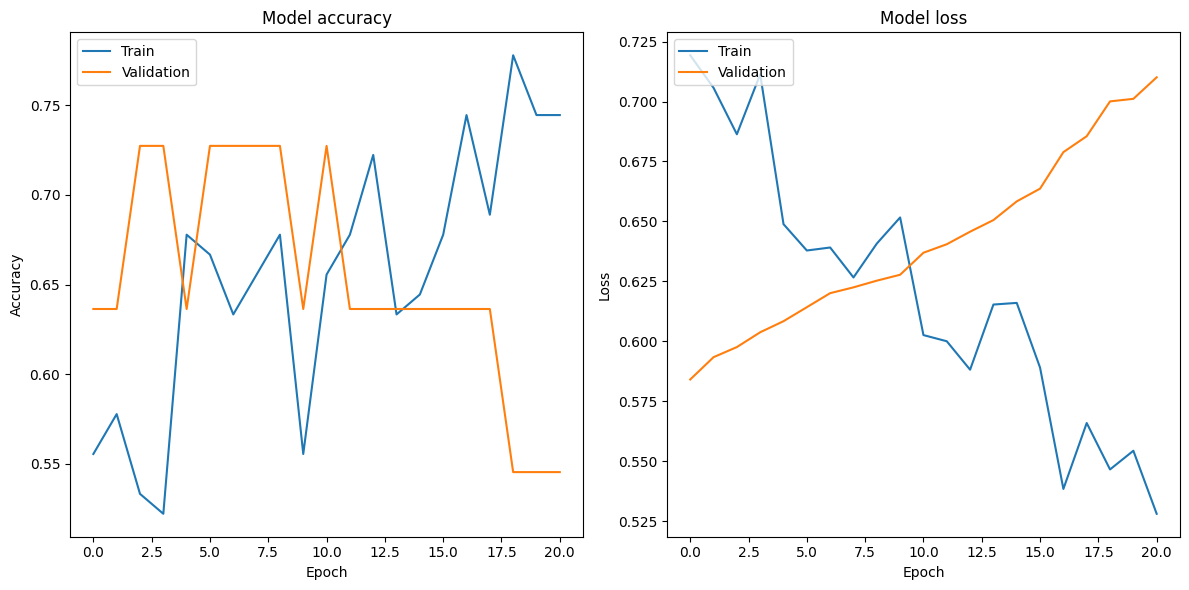

In [ ]:
# Function to load the dataset
def load_dataset(file_path):
    df = pd.read_excel(file_path)  # Assuming the data is in CSV format
    print(df.info())
    X = df.drop('Result', axis=1).values
    y = df['Result'].values
    return X, y

# Function to augment data by adding noise
def augment_data(X, y, noise_factor=0.05):
    X_aug = X.copy()
    for i in range(len(X_aug)):
        for j in range(len(X_aug[i])):
            X_aug[i][j] += np.random.normal(loc=0.0, scale=noise_factor)
    return np.concatenate((X, X_aug)), np.concatenate((y, y))

# Load the dataset
file_path = '/content/final.xlsx'  # Update with your file path
X, y = load_dataset(file_path)

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Augment the training data
X_train_aug, y_train_aug = augment_data(X_train, y_train)

# Combine original and augmented data
X_train = np.concatenate((X_train, X_train_aug))
y_train = np.concatenate((y_train, y_train_aug))

# Define and train the FNN model
input_dim = X_train.shape[1]
model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {i: class_weights[i] for i in range(len(class_weights))}

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1,
                    class_weight=class_weight, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model weights
model.save_weights('./checkpoints/my_checkpoint1')

In [ ]:
for i in range(len(y_test)):
  sample_index = i# Choose the index of the sample data point
  sample_data = X_test[sample_index].reshape(1, -1)  # Reshape the sample data for prediction
  prediction = model.predict(sample_data)

  # Interpret the prediction
  if prediction[0] >= 0.50:
      interpretation = "has fracture"
      pred = 1
  else:
      interpretation = "doesn't have fracture"
      pred = 0

  print("Prediction:", prediction[0], "\nPrediction: ", pred, "\nreal result: ", y_test[i])
  print("Interpretation:", interpretation)

1/1 [==============================] - 0s 86ms/step
Prediction: [0.49584943] 
Prediction:  0 
real result:  0
Interpretation: doesn't have fracture
1/1 [==============================] - 0s 17ms/step
Prediction: [0.5608979] 
Prediction:  1 
real result:  0
Interpretation: has fracture
1/1 [==============================] - 0s 17ms/step
Prediction: [0.6012499] 
Prediction:  1 
real result:  0
Interpretation: has fracture
1/1 [==============================] - 0s 17ms/step
Prediction: [0.47207686] 
Prediction:  0 
real result:  1
Interpretation: doesn't have fracture
1/1 [==============================] - 0s 18ms/step
Prediction: [0.4803671] 
Prediction:  0 
real result:  1
Interpretation: doesn't have fracture
1/1 [==============================] - 0s 19ms/step
Prediction: [0.6206811] 
Prediction:  1 
real result:  0
Interpretation: has fracture
1/1 [==============================] - 0s 16ms/step
Prediction: [0.5190122] 
Prediction:  1 
real result:  0
Interpretation: has fracture
1/1 [

In [ ]:
# Extract weights from the first layer of the trained model
first_layer_weights = model.layers[0].get_weights()[0]

# Assuming X_train is standardized
# If not standardized, you should standardize it before analyzing weights
# (you can use the same scaler you used for training)
scaled_features = scaler.fit_transform(X_train)

# Calculate the importance of each feature based on the average absolute weight across neurons
feature_importance = np.mean(np.abs(first_layer_weights), axis=1)

# Get the indices of the top k most influential features
k = 5  # Number of top features to identify
top_indices = feature_importance.argsort()[-k:][::-1]

# Print the names or indices of the top k most influential features
feature_names = ['Sexe(F/H)', 'Age', 'BV(mm^3)', 'TV(mm^3)', 'BV/TV', 'Tb.ThMean(mm)', 'Tb.Th Std Dev(mm)', 'Tb.Th Max (mm)', 'Euler char (x)', 'Corr.Euler', 'Connectivity', 'Conn.D(mm^3)', 'Tb,Sp Mean(mm)', 'Tb.Sp Std Dev(mm)', 'Tb.Sp Max(mm)']
top_features = [feature_names[i] for i in top_indices]
print("Top", k, "most influential features:")
for feature in top_features:
    print(feature)


Top 5 most influential features:
Tb.Sp Max(mm)
Tb,Sp Mean(mm)
Tb.Th Std Dev(mm)
Age
TV(mm^3)


In [ ]:
# Restore the weights
model.load_weights('./checkpoints/my_checkpoint1')